# Notebook to perform QC of CosMX RNA Data

## Instructions

- Create an environment that has relevant and required packages installed (see env_setup.sh as starting point)
- Helper functions are defined in helper_functions.R (imported with other imports)
- The script assumes that data was exported from AtoMx as Seurat objects (rds). Place those files in a folder and define it here as data_dir. The script will load all objects in that folder
- Manual Annotation per CosMx Slide: If a CosMx slide has multiple samples, it is required to manually match FOVs to those samples. This can be done by looking on the AtoMx platform and noting down the FOVs that correspond to a sample. Additional meta data on a sample-level should also be defined manually. Helpers are defined to streamline this process.

## Imports

In [1]:
# Load Packages
library(Seurat)
library(dplyr)
library(tidyr)
library(stringr)
library(ggplot2)
library(gridExtra)
library(patchwork)
library(data.table)
library(Matrix)
library(harmony)
library(ggrepel)
library(pals)
library(RColorBrewer)
library(ggrastr)
library(cluster)
library(ggrepel)
library(gtools)
library(tibble)
library(scPearsonPCA)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last



Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loading required package: Rcpp



In [44]:
# Load helper functions
source("helper_functions.R")

## Data Loading

In [4]:
# Define directories
data_dir <- "./data" # Folder containing Seurat objects
out_dir <- "./output" # Folder for outputs
study_name <- "Test"
dir.create(out_dir, showWarnings = FALSE, recursive = TRUE)

In [5]:
# Load Seurat objects from folder into list
all_seurat_objects <- load_seurat_objects(data_dir)
print("successfully loaded all seurat objects")

[1] "./data/seuratObject_TMA11.RDS" "./data/seuratObject_TMA12.RDS"
[1] "TMA11" "TMA12"
[1] "Removing assay: QC_Normalization.RNA.1_1"
[1] "Removing assay: QC_Normalization.RNA.1_1"
[1] "successfully loaded all seurat objects"


In [6]:
# Update Seurat objects (removes images, as presence of images breaks subsetting)
for (slide_name in names(all_seurat_objects)) {
    message("Updating Seurat object: ", slide_name)
    all_seurat_objects[[slide_name]]@images <- list()
    all_seurat_objects[[slide_name]] <- suppressWarnings(suppressMessages(UpdateSeuratObject(all_seurat_objects[[slide_name]])))
}

Updating Seurat object: TMA11



Updating Seurat object: TMA12



## Manual Annotations per Slide

This section is project specific and should be adjusted accordingly

In [8]:
# Load CSV with metadata
metadata_csv <- process_tma_csv(file.path(data_dir, "sample_metadata.csv"))
head(metadata_csv)

study_id,tma_number,location,batch,type
<chr>,<chr>,<chr>,<chr>,<chr>
0040-79,1,D2,1,T
0040-79,1,E2,1,T
0040-79,1,F2,1,T
0040-79,1,G2,1,N
0048-05,1,A3,1,T
0048-05,1,B3,1,T


In [9]:
# Add metadata
for (slide_name in names(all_seurat_objects)) {
  # Add slide_id metadata = slide_name
  slide_number <- sub("^TMA", "", slide_name)
  all_seurat_objects[[slide_name]]$slide_id <- slide_number
  all_seurat_objects[[slide_name]]$slide_id <- as.character(all_seurat_objects[[slide_name]]$slide_id)
}

In [10]:
print(names(all_seurat_objects))
all_seurat_objects

[1] "TMA11" "TMA12"


$TMA11
An object of class Seurat 
6519 features across 323666 samples within 3 assays 
Active assay: RNA (6175 features, 0 variable features)
 2 layers present: counts, data
 2 other assays present: falsecode, negprobes
 2 dimensional reductions calculated: QC_UMAP.1_1, QC_PCA.1_1

$TMA12
An object of class Seurat 
6519 features across 306920 samples within 3 assays 
Active assay: RNA (6175 features, 0 variable features)
 2 layers present: counts, data
 2 other assays present: falsecode, negprobes
 2 dimensional reductions calculated: QC_UMAP.1_1, QC_PCA.1_1


### Slide 1

In [ ]:
# helper function to assign FOVs to samples
# make_casewhen(c(3, 10, 16, 23, 31, 38, 45, 51, 53, 60, 68, 76, 83, 87, 94, 101, 109, 116, 120, 127, 134, 141, 147, 153, 160, 167, 175, 181, 189, 196, 203, 211, 219, 225, 233, 241, 248, 257, 264, 272, 280, 287, 295, 303, 311, 314, 322, 330, 338, 346, 354, 361, 369, 377, 384, 390, 393, 400, 407, 415, 422, 430, 437))

In [12]:
slide_name <- "TMA11"
seu.obj <- all_seurat_objects[[slide_name]]

seu.obj@meta.data <- seu.obj@meta.data %>%
  mutate(region = case_when(
    fov %in% 1:3 ~ "1",
    fov %in% 4:10 ~ "2",
    fov %in% 11:16 ~ "3",
    fov %in% 17:23 ~ "4",
    fov %in% 24:31 ~ "5",
    fov %in% 32:38 ~ "6",
    fov %in% 39:45 ~ "7",
    fov %in% 46:51 ~ "8",
    fov %in% 52:53 ~ "9",
    fov %in% 54:60 ~ "10",
    fov %in% 61:68 ~ "11",
    fov %in% 69:76 ~ "12",
    fov %in% 77:83 ~ "13",
    fov %in% 84:87 ~ "14",
    fov %in% 88:94 ~ "15",
    fov %in% 95:101 ~ "16",
    fov %in% 102:109 ~ "17",
    fov %in% 110:116 ~ "18",
    fov %in% 117:120 ~ "19",
    fov %in% 121:127 ~ "20",
    fov %in% 128:134 ~ "21",
    fov %in% 135:141 ~ "22",
    fov %in% 142:147 ~ "23",
    fov %in% 148:153 ~ "24",
    fov %in% 154:160 ~ "25",
    fov %in% 161:167 ~ "26",
    fov %in% 168:175 ~ "27",
    fov %in% 176:181 ~ "28",
    fov %in% 182:189 ~ "29",
    fov %in% 190:196 ~ "30",
    fov %in% 197:203 ~ "31",
    fov %in% 204:211 ~ "32",
    fov %in% 212:219 ~ "33",
    fov %in% 220:225 ~ "34",
    fov %in% 226:233 ~ "35",
    fov %in% 234:241 ~ "36",
    fov %in% 242:248 ~ "37",
    fov %in% 249:257 ~ "38",
    fov %in% 258:264 ~ "39",
    fov %in% 265:272 ~ "40",
    fov %in% 273:280 ~ "41",
    fov %in% 281:287 ~ "42",
    fov %in% 288:295 ~ "43",
    fov %in% 296:303 ~ "44",
    fov %in% 304:311 ~ "45",
    fov %in% 312:314 ~ "46",
    fov %in% 315:322 ~ "47",
    fov %in% 323:330 ~ "48",
    fov %in% 331:338 ~ "49",
    fov %in% 339:346 ~ "50",
    fov %in% 347:354 ~ "51",
    fov %in% 355:361 ~ "52",
    fov %in% 362:369 ~ "53",
    fov %in% 370:377 ~ "54",
    fov %in% 378:384 ~ "55",
    fov %in% 385:390 ~ "56",
    fov %in% 391:393 ~ "57",
    fov %in% 394:400 ~ "58",
    fov %in% 401:407 ~ "59",
    fov %in% 408:415 ~ "60",
    fov %in% 416:422 ~ "61",
    fov %in% 423:430 ~ "62",
    fov %in% 431:437 ~ "63",
    TRUE ~ "Unknown"
  ),
    region = factor(region, levels = c("Unknown", as.character(sort(unique(as.numeric(region))))))
  ) 

# Define mapping from numeric region to grid names
region_map <- c(
  "1" = "G10", "2" = "G9", "3" = "G8", "4" = "G7", "5" = "G6", "6" = "G5", "7" = "G3", "8" = "G2", "9" = "G1",
  "10" = "F10", "11" = "F9", "12" = "F8", "13" = "F7", "14" = "F6", "15" = "F5", "16" = "F4", "17" = "F3", "18" = "F2", "19" = "F1",
  "20" = "E10", "21" = "E9", "22" = "E8", "23" = "E7", "24" = "E6", "25" = "E5", "26" = "E4", "27" = "E3", "28" = "E2", "29" = "E1",
  "30" = "D9", "31" = "D8", "32" = "D7", "33" = "D6", "34" = "D5", "35" = "D4", "36" = "D3", "37" = "D2", 
  "38" = "C9", "39" = "C8", "40" = "C7", "41" = "C6", "42" = "C5", "43" = "C4", "44" = "C3", "45" = "C2",
  "46" = "B10", "47" = "B9", "48" = "B8", "49" = "B7", "50" = "B6", "51" = "B5", "52" = "B4", "53" = "B3", "54" = "B2",
  "55" = "A9", "56" = "A8", "57" = "A7", "58" = "A6", "59" = "A5", "60" = "A4", "61" = "A3", "62" = "A2", "63" = "A1"
)

seu.obj@meta.data <- seu.obj@meta.data %>%
  mutate(location = region_map[as.character(region)])

# Merge additional metadata directly into Seurat object's meta.data
seu.obj@meta.data <- seu.obj@meta.data %>%
  mutate(temp_cellid = rownames(seu.obj@meta.data)) %>%
  left_join(
    metadata_csv %>%
      rename(condition = type),
    by = c("location" = "location", "slide_id" = "tma_number")
  ) %>%
  column_to_rownames(var = "temp_cellid")

seu.obj@meta.data <- seu.obj@meta.data %>%
  mutate(region = paste0(slide_id, "_", location)) %>%
  mutate(region = factor(region, levels = mixedsort(unique(region)))) %>%  # Map numeric -> new name
  mutate(location = factor(location, levels = mixedsort(unique(location))))

# Keep only cells where location is not "A1 (Marker (lung))"
seu.obj <- subset(seu.obj, subset = location != "A1")

# Save back to list
all_seurat_objects[[slide_name]] <- seu.obj

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


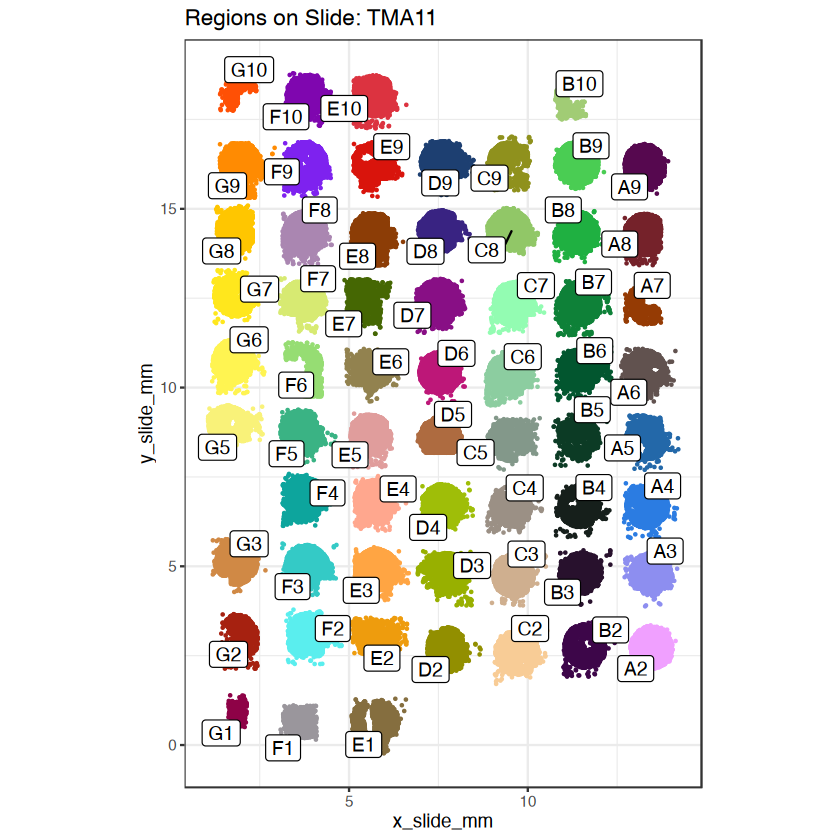

In [13]:
md <- seu.obj@meta.data
cluster_col <- "location"

xyplot(cluster_col, x_column = "x_slide_mm", y_column = "y_slide_mm", 
                   metadata = md, 
                   alphasize = 1, show_legend = FALSE, show_labels = TRUE,
  label_color = "black",
  label_repel = TRUE) + ggtitle(paste("Regions on Slide:", slide_name))

### Slide 2

In [41]:
# make_casewhen(c(8, 15, 22, 30, 37, 45, 54, 60, 68, 70, 78, 85, 92, 97, 101, 104, 111, 118, 127, 129, 136, 138, 145, 153, 158, 164, 171, 175, 183, 190, 197, 205, 213, 220, 226, 227, 234, 242, 248, 252, 256, 260, 267, 275, 281, 288, 295, 301, 308, 315, 318, 325, 328, 335, 343, 349, 355, 363, 371, 377, 384, 393, 401, 408, 415))

In [14]:
slide_name <- "TMA12"
seu.obj <- all_seurat_objects[[slide_name]]

seu.obj@meta.data <- seu.obj@meta.data %>%
  mutate(region = case_when(
    fov %in% 1:8 ~ "1",
    fov %in% 9:15 ~ "2",
    fov %in% 16:22 ~ "3",
    fov %in% 23:30 ~ "4",
    fov %in% 31:37 ~ "5",
    fov %in% 38:45 ~ "6",
    fov %in% 46:54 ~ "7",
    fov %in% 55:60 ~ "8",
    fov %in% 61:68 ~ "9",
    fov %in% 69:70 ~ "10",
    fov %in% 71:78 ~ "11",
    fov %in% 79:85 ~ "12",
    fov %in% 86:92 ~ "13",
    fov %in% 93:97 ~ "14",
    fov %in% 98:101 ~ "15",
    fov %in% 102:104 ~ "16",
    fov %in% 105:111 ~ "17",
    fov %in% 112:118 ~ "18",
    fov %in% 119:127 ~ "19",
    fov %in% 128:129 ~ "20",
    fov %in% 130:136 ~ "21",
    fov %in% 137:138 ~ "22",
    fov %in% 139:145 ~ "23",
    fov %in% 146:153 ~ "24",
    fov %in% 154:158 ~ "25",
    fov %in% 159:164 ~ "26",
    fov %in% 165:171 ~ "27",
    fov %in% 172:175 ~ "28",
    fov %in% 176:183 ~ "29",
    fov %in% 184:190 ~ "30",
    fov %in% 191:197 ~ "31",
    fov %in% 198:205 ~ "32",
    fov %in% 206:213 ~ "33",
    fov %in% 214:220 ~ "34",
    fov %in% 221:226 ~ "35",
    fov %in% 227:227 ~ "36",
    fov %in% 228:234 ~ "37",
    fov %in% 235:242 ~ "38",
    fov %in% 243:248 ~ "39",
    fov %in% 249:252 ~ "40",
    fov %in% 253:256 ~ "41",
    fov %in% 257:260 ~ "42",
    fov %in% 261:267 ~ "43",
    fov %in% 268:275 ~ "44",
    fov %in% 276:281 ~ "45",
    fov %in% 282:288 ~ "46",
    fov %in% 289:295 ~ "47",
    fov %in% 296:301 ~ "48",
    fov %in% 302:308 ~ "49",
    fov %in% 309:315 ~ "50",
    fov %in% 316:318 ~ "51",
    fov %in% 319:325 ~ "52",
    fov %in% 326:328 ~ "53",
    fov %in% 329:335 ~ "54",
    fov %in% 336:343 ~ "55",
    fov %in% 344:349 ~ "56",
    fov %in% 350:355 ~ "57",
    fov %in% 356:363 ~ "58",
    fov %in% 364:371 ~ "59",
    fov %in% 372:377 ~ "60",
    fov %in% 378:384 ~ "61",
    fov %in% 385:393 ~ "62",
    fov %in% 394:401 ~ "63",
    fov %in% 402:408 ~ "64",
    fov %in% 409:415 ~ "65",
    TRUE ~ "Unknown"
  ),
    region = factor(region, levels = c("Unknown", as.character(sort(unique(as.numeric(region))))))
  ) 

  # Define mapping from numeric region to grid names
region_map <- c(
  "1" = "G10", "2" = "G9", "3" = "G8", "4" = "G7", "5" = "G6", 
  "6" = "G5", "7" = "G4", "8" = "G3", "9" = "G2", "10" = "G1",
  "11" = "F10", "12" = "F9", "13" = "F8", "14" = "F7", "15" = "F6",
  "16" = "F5", "17" = "F4", "18" = "F3", "19" = "F2", "20" = "F1",
  "21" = "E10", "22" = "E9", "23" = "E8", "24" = "E7", "25" = "E6",
  "26" = "E5", "27" = "E4", "28" = "E3", "29" = "E2", "30" = "D10",
  "31" = "D9", "32" = "D8", "33" = "D7", "34" = "D6", "35" = "D5",
  "36" = "D4", "37" = "D3", "38" = "D2", "39" = "C10", "40" = "C9",
  "41" = "C8", "42" = "C7", "43" = "C6", "44" = "C5", "45" = "C4",
  "46" = "C3", "47" = "C2", "48" = "B10", "49" = "B9", "50" = "B8",
  "51" = "B6", "52" = "B5", "53" = "B4", "54" = "B3", "55" = "B2",
  "56" = "A10", "57" = "A9", "58" = "A8", "59" = "A7", "60" = "A6",
  "61" = "A5", "62" = "A4", "63" = "A3", "64" = "A2", "65" = "A1"
)

seu.obj@meta.data <- seu.obj@meta.data %>%
  mutate(location = region_map[as.character(region)])

# Merge additional metadata directly into Seurat object's meta.data
seu.obj@meta.data <- seu.obj@meta.data %>%
  mutate(temp_cellid = rownames(seu.obj@meta.data)) %>%
  left_join(
    metadata_csv %>%
      rename(condition = type),
    by = c("location" = "location", "slide_id" = "tma_number")
  ) %>%
  column_to_rownames(var = "temp_cellid")

seu.obj@meta.data <- seu.obj@meta.data %>%
  mutate(region = paste0(slide_id, "_", location)) %>%
  mutate(region = factor(region, levels = mixedsort(unique(region)))) %>%  # Map numeric -> new name
  mutate(location = factor(location, levels = mixedsort(unique(location))))

# Keep only cells where location is not "A1 (Marker (lung))"
seu.obj <- subset(seu.obj, subset = location != "A1")

# Save back to list
all_seurat_objects[[slide_name]] <- seu.obj

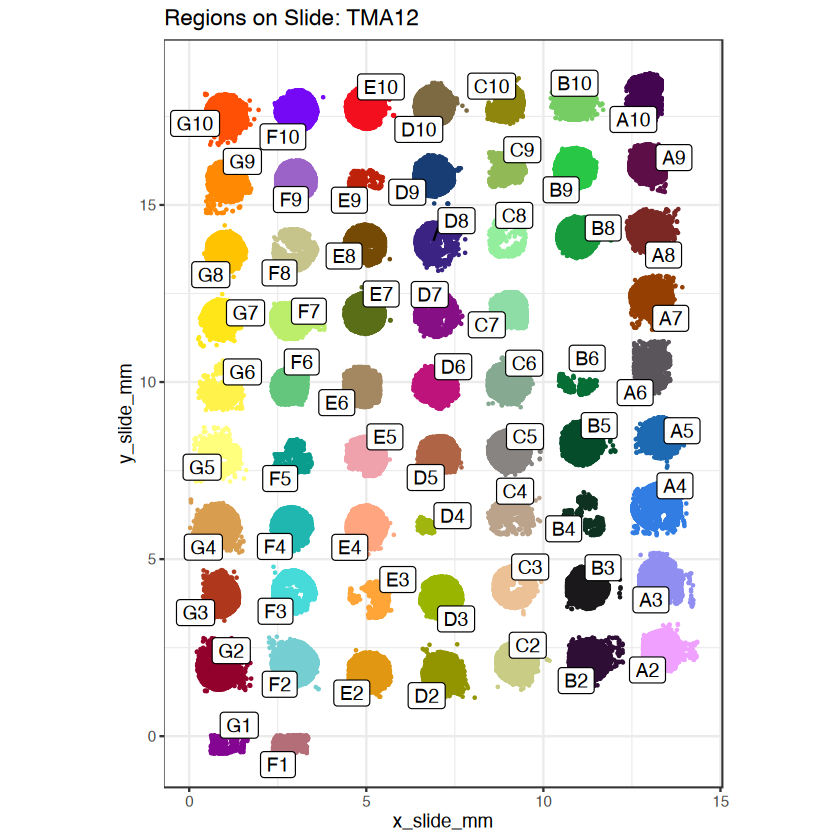

In [15]:
md <- seu.obj@meta.data
cluster_col <- "location"

xyplot(cluster_col, x_column = "x_slide_mm", y_column = "y_slide_mm", 
                   metadata = md, 
                   alphasize = 1, show_legend = FALSE, show_labels = TRUE,
  label_color = "black",
  label_repel = TRUE) + ggtitle(paste("Regions on Slide:", slide_name))

### Add additional slides if necessary

## Quality Control Analysis

In [16]:
# Create QC Report for each individual slide
qc_all_slides(all_seurat_objects, outdir = out_dir, region_col = "location")

Running QC for: TMA11

Warning message:
“The `slot` argument of `FetchData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
Warning message:
“`PackageCheck()` was deprecated in SeuratObject 5.0.0.
ℹ Please use `rlang::check_installed()` instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points si

## Quality Control Filtering

In [ ]:
# Filter objects based on quality control

# result <- suppressWarnings(filter_seurat_objects(all_seurat_objects, thresholds_list = NULL))
result <- filter_seurat_objects(all_seurat_objects, flag_col = "qcCellsFlagged", low_thres = 0.025, high_thres = 0.975, area_upper = 600, area_lower = 40, region_col = "region", min_cells_per_region = 500)
filtered_objects <- result$filtered_objects
filter_log <- result$filter_log

# Clean up
rm(result)
gc()

# Info
filter_log

Filtering: TMA11



Counting flagged cells before filtering TMA11

Determining thresholds TMA11

Filtering flagged cells for TMA11

Filtered slide: TMA11  | Total cells: 317156  | Cells removed: 42860  | Cells removed (calc): 42860 | Remaining cells: 274296

Filtering: TMA12

Counting flagged cells before filtering TMA12

Determining thresholds TMA12

Filtering flagged cells for TMA12

Filtered slide: TMA12  | Total cells: 300570  | Cells removed: 40362  | Cells removed (calc): 40362 | Remaining cells: 260208



,used,(Mb),gc trigger,(Mb),limit (Mb),max used,(Mb)
Ncells,5132093,274.1,16389340,875.3,NA,32010427,1709.6
Vcells,1743382095,13301.0,3203000261,24437.0,32768,3202898051,24436.2


Slide,Total_Cells,Bottom_Threshold,Bottom_Removed,Bottom_Percent,Top_Threshold,Top_Removed,Top_Percent,Flagged_Before_Threshold,Flagged_After_Threshold,Flagged_Removed,Flagged_Percent,Area_Upper_Threshold,Area_Lower_Threshold,Area_Removed,Remaining_Cells,Remaining_Percent,Cells_Removed,Cells_Removed_Percent
<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>
TMA11,317156,15,8039,2.53,2314,7938,2.5,10971,2932,2932,0.92,600,40,23951,274296,86.49,42860,13.51
TMA12,300570,23,7932,2.64,2878,7520,2.5,6199,39,39,0.01,600,40,24871,260208,86.57,40362,13.43


In [19]:
# Create QC Report for each individual slide after filtering
qc_all_slides(filtered_objects, outdir = out_dir, file_prefix = "QC_Report_Filtered_", filter_log = filter_log, region_col = "location")

Running QC for: TMA11

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Running QC for: TMA12

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points

### Saving individual filtered objects 

In [20]:
for (slide_name in names(filtered_objects)) {
  seu_filtered <- filtered_objects[[slide_name]]
  saveRDS(seu_filtered, file.path(out_dir, paste0("filtered_", slide_name, ".RDS")))
}

In [21]:
# clean up memory
rm(all_seurat_objects)
gc()

,used,(Mb),gc trigger,(Mb),limit (Mb),max used,(Mb)
Ncells,5059307,270.2,16389340,875.3,NA,32010427,1709.6
Vcells,1304355775,9951.5,3203000261,24437.0,32768,3202898051,24436.2


## Merging individual objects (slides) into one

In [22]:
# Ensure unique cell IDs
for (slide_name in names(filtered_objects)) {

  # Rename cells with slide prefix
  filtered_objects[[slide_name]] <- RenameCells(
    filtered_objects[[slide_name]],
    new.names = paste0(filtered_objects[[slide_name]]@meta.data$slide_id, "_", filtered_objects[[slide_name]]@meta.data$cell_ID))

  # Add new unique cell ID column
  filtered_objects[[slide_name]]$cell_ID_new <- rownames(filtered_objects[[slide_name]]@meta.data)
}

In [23]:
# Merge all slides into one Seurat object
merged_obj <- merge(
  x = filtered_objects[[1]],
  y = filtered_objects[-1],
  project = "CosMx_RNA"
)

In [24]:
merged_obj
# colnames(merged_obj@meta.data)
unique(merged_obj@meta.data$slide_id)
head(merged_obj@meta.data)
str(merged_obj@meta.data$region)

An object of class Seurat 
6519 features across 534504 samples within 3 assays 
Active assay: RNA (6175 features, 0 variable features)
 2 layers present: counts, data
 2 other assays present: falsecode, negprobes

[1] "11" "12"

,RNA_QC_Cell.Typing.InSituType.1_1_clusters,RNA_QC_Cell.Typing.InSituType.1_1_posterior_probability,fov,Area,AspectRatio,x_FOV_px,y_FOV_px,Width,Height,Mean.PanCK,⋯,RNA_QC_Neighborhood.Analysis.1_1_neighbours_i,RNA_QC_Neighborhood.Analysis.1_1_neighbours_j,QC_Neighborhood.Analysis.1_1_assignments,slide_id,region,location,study_id,batch,condition,cell_ID_new
,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,⋯,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
11_c_1_100_123,f,1,100,14810,0.88,3054,838,130,148,5136.1,⋯,0,2,niche1,11,11_F4,F4,0360-25,4,T,11_c_1_100_123
11_c_1_100_14,e,0.999999999999995,100,11821,0.97,4159,93,170,165,980.1,⋯,0,1,niche1,11,11_F4,F4,0360-25,4,T,11_c_1_100_14
11_c_1_100_16,f,1,100,10929,0.61,2329,69,154,94,363.0,⋯,0,0,niche1,11,11_F4,F4,0360-25,4,T,11_c_1_100_16
11_c_1_100_193,f,1,100,7280,0.54,3175,1300,141,76,410.4,⋯,0,2,niche1,11,11_F4,F4,0360-25,4,T,11_c_1_100_193
11_c_1_100_213,j,0.548830457009317,100,16344,0.96,3212,1587,152,146,2536.8,⋯,0,1,niche1,11,11_F4,F4,0360-25,4,T,11_c_1_100_213
11_c_1_100_261,f,0.997177248222784,100,3235,0.78,3499,1901,57,73,317.3,⋯,0,1,niche1,11,11_F4,F4,0360-25,4,T,11_c_1_100_261


 chr [1:534504] "11_F4" "11_F4" "11_F4" "11_F4" "11_F4" "11_F4" "11_F4" ...


In [25]:
# Reorder regions
merged_obj@meta.data$region <- factor(
  merged_obj@meta.data$region,
  levels = mixedsort(unique(merged_obj@meta.data$region))
)

In [ ]:
# Offset x-coordinates so slides don't overlap
# Apply sequential offsets for each slide beyond the first
# Get maximum width per slide and apply cumulative shifts

slide_names <- names(filtered_objects)
if (length(slide_names) > 1) {

  offsets <- c(0)  # first slide stays at 0

  for (i in 2:length(slide_names)) {

    prev_slide <- sub("^TMA", "", slide_names[i - 1])
    this_slide <- sub("^TMA", "", slide_names[i])
    
    # Find max x of the previous slide
    prev_max <- max(
      merged_obj@meta.data$x_slide_mm[merged_obj@meta.data$slide_id == prev_slide],
      na.rm = TRUE
    )
    
    # Define offset as previous max + 1 (mm)
    offsets[i] <- prev_max + 1
    
    # Apply offset to current slide
    merged_obj@meta.data$x_slide_mm[merged_obj@meta.data$slide_id == this_slide] <-
      merged_obj@meta.data$x_slide_mm[merged_obj@meta.data$slide_id == this_slide] + offsets[i]
  }
} else {
  message("Single slide detected. Skipping spatial offsets.")
}

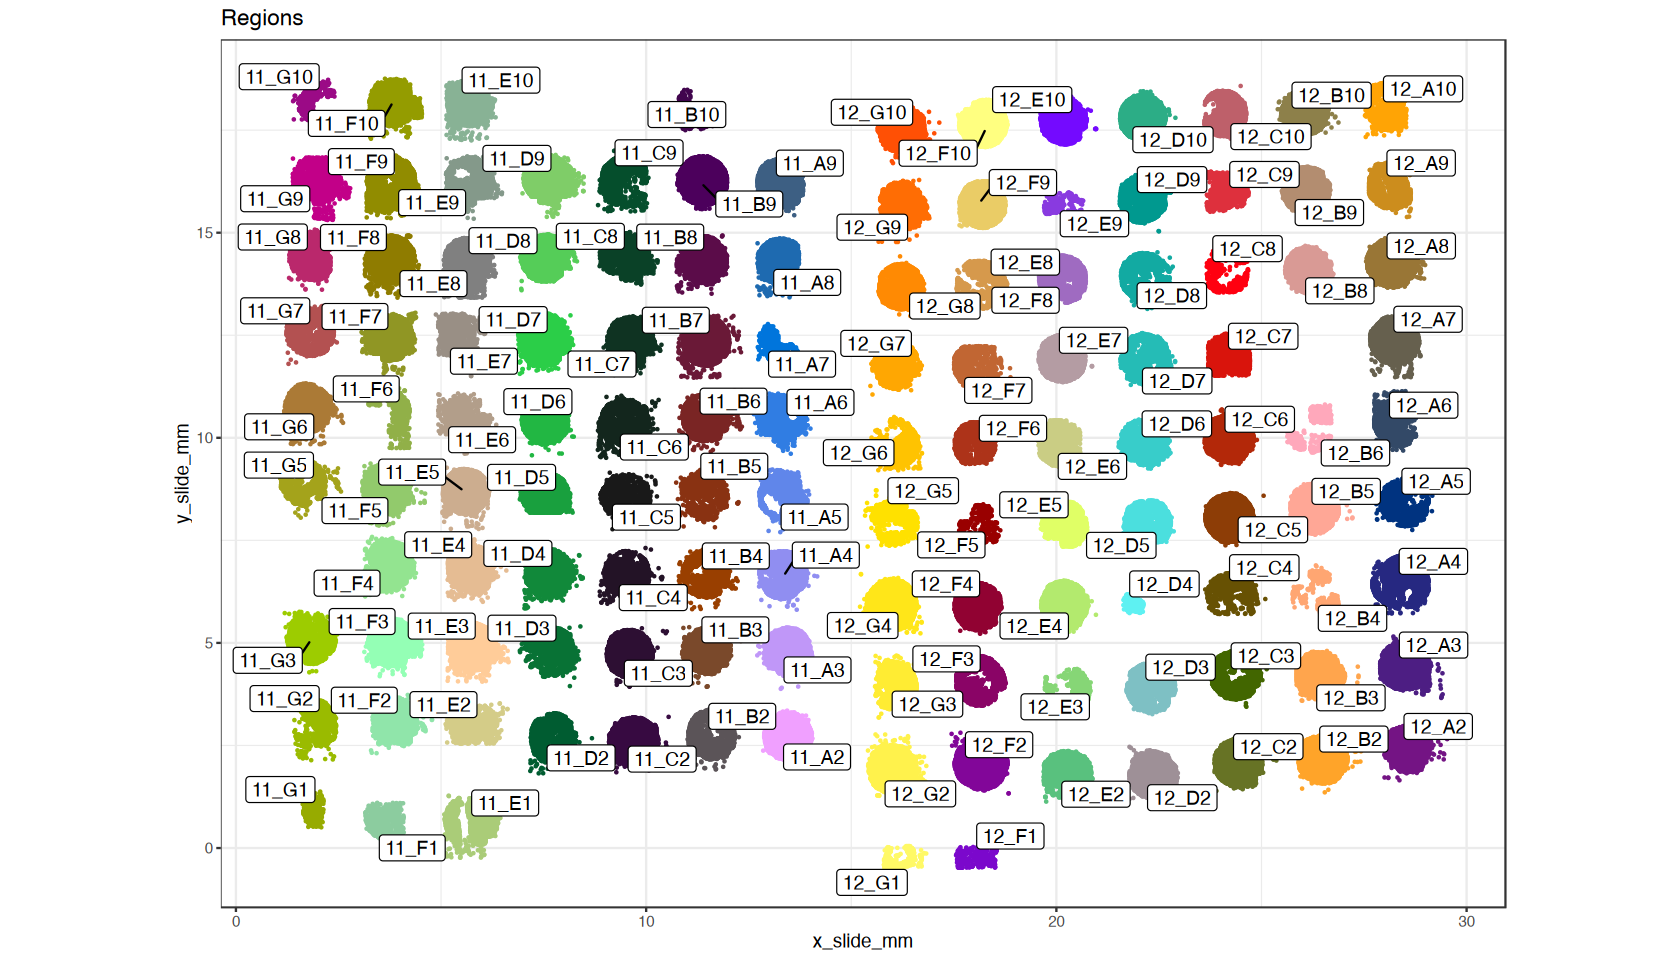

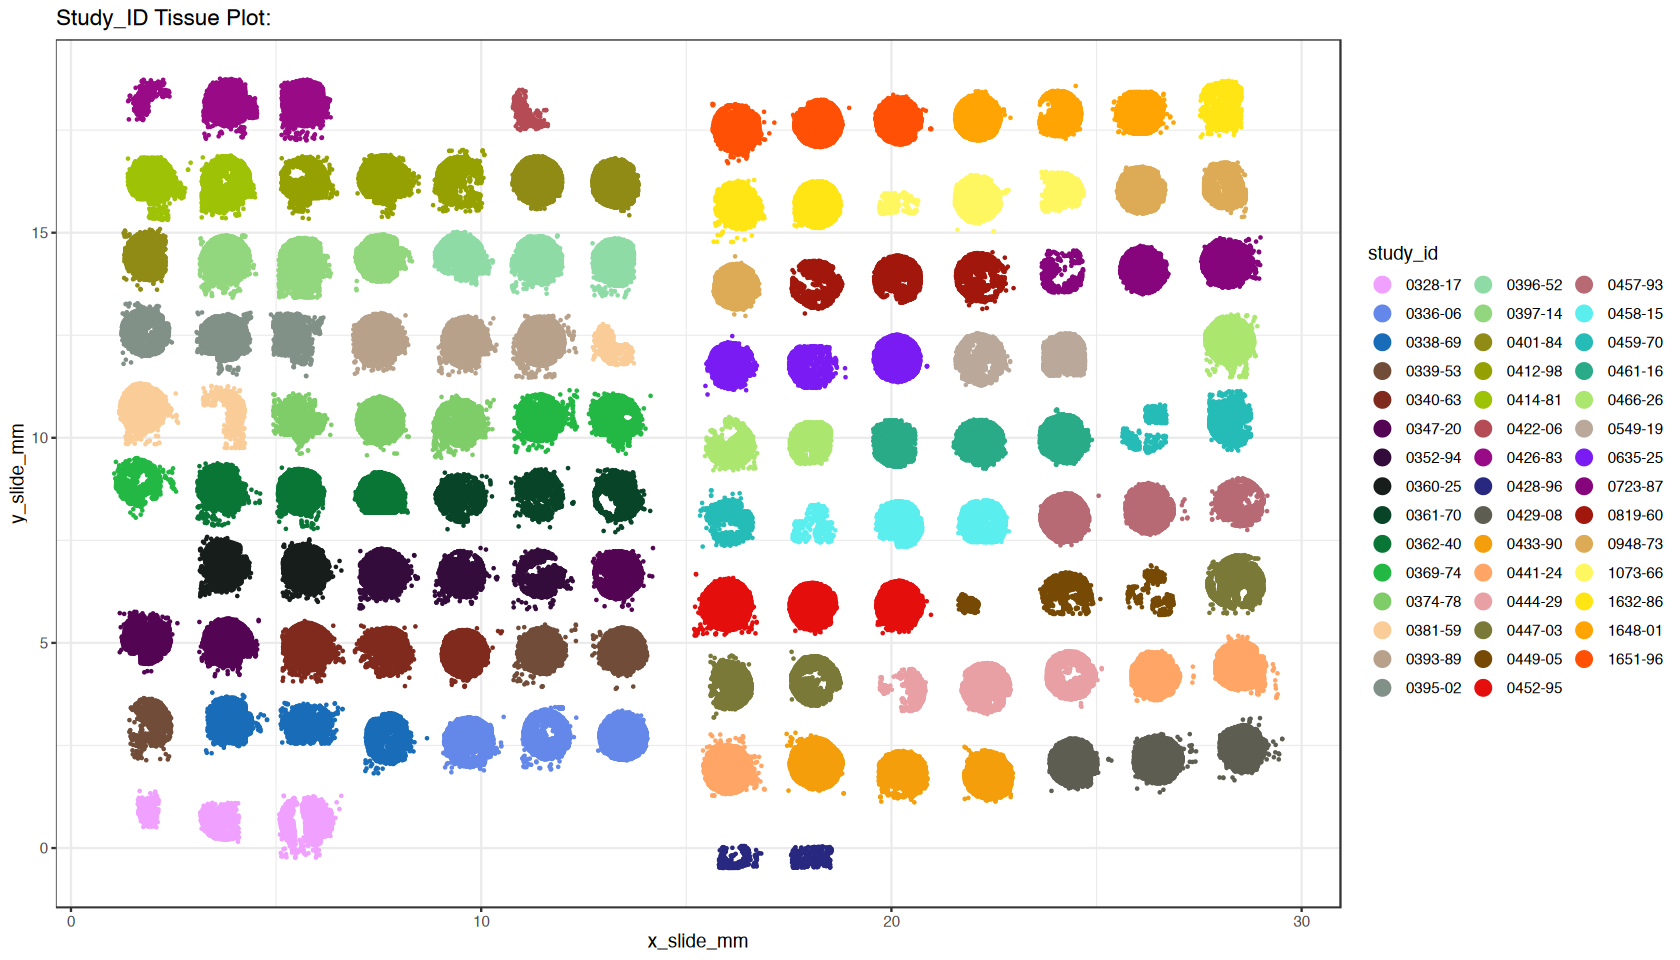

In [27]:
# Visualize to check if offsets are correct
options(repr.plot.width=14, repr.plot.height=8)

# Tissue plot from metadata
cluster_col <- "region"

xyplot(cluster_col, x_column = "x_slide_mm", y_column = "y_slide_mm", 
                   metadata = merged_obj@meta.data, 
                   alphasize = 1, show_legend = FALSE, show_labels = TRUE,
  label_color = "black",
  label_repel = TRUE) + ggtitle(paste("Regions"))


cluster_col <- "study_id"
xyplot(cluster_col, x_column = "x_slide_mm", y_column = "y_slide_mm", 
                   metadata = merged_obj@meta.data, 
                   alphasize = 1, show_legend = TRUE, show_labels = FALSE) + 
  ggtitle(paste("Study_ID Tissue Plot:"))

In [28]:
# clean up memory
rm(filtered_objects)
gc()

,used,(Mb),gc trigger,(Mb),limit (Mb),max used,(Mb)
Ncells,5604345,299.4,16389340,875.3,NA,32010427,1709.6
Vcells,1749237769,13345.7,3203000261,24437.0,32768,3202929864,24436.5


In [29]:
# Create QC Report for merged object
qc_report(merged_obj, "All_Slides", out_dir, file_prefix = "QC_Report_Merged_", region_col = "region")
# qc_report(merged_obj, "All_Slides", out_dir, file_prefix = "QC_Report_Merged_byPatient_", region_col = "study_id")

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



agg_record_1327606166 
                    2

### Saving merged object

In [30]:
saveRDS(merged_obj, file.path(out_dir, paste0("merged_object_", study_name, ".RDS")))

## Downstream Analysis with scPearsonPCA

see https://nanostring-biostats.github.io/CosMx-Analysis-Scratch-Space/posts/pearsonpca/

In [31]:
# # read in merged object (optional)
# merged_obj <- readRDS(file.path(out_dir, paste0("merged_object_", study_name, ".RDS")))

### No Batch Correction

#### scPearsonPCA

In [ ]:
# Define parameters
nfeatures = 3000
run_prefix <- "scpearson"
run_suffix <- "nobatch"
slot_names = list(
    pca = paste0(run_prefix, "_pca_", run_suffix),
    umap = paste0(run_prefix, "_umap_", run_suffix),
    graph = paste0(run_prefix, "_graph_", run_suffix),
    clusters = paste0(run_prefix, "_clusters_", run_suffix)
    )

In [33]:
# Run scPearsonPCA
results <- suppressMessages(suppressWarnings(
  apply_scPearsonPCA(merged_obj, nfeatures = nfeatures, slot_names = slot_names)
))

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 534504
Number of edges: 14017191

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8377
Number of communities: 28
Elapsed time: 152 seconds


In [34]:
# Save results back as merged object
merged_obj <- results$seu

In [35]:
# Visualize outcome
reduction <- slot_names$umap
slide_name <- paste0(run_prefix, "_", run_suffix)
cluster_col <- c(slot_names$clusters)


# Plot umaps
umap_plots(merged_obj, 
            slide_name = slide_name, 
            outdir = out_dir, 
            file_prefix = "UMAPS_", 
            reduction = reduction,
            cluster_col = cluster_col)

# Plot xy plots
xy_plots(merged_obj,
        slide_name = slide_name,
        outdir = out_dir,
        file_prefix = "XY_PLOTS_",
        cluster_col = cluster_col,
        shuffle = TRUE,
        show_legend = TRUE)

# Plot xy plots per region
suppressWarnings(xy_plots_by_region(
  merged_obj,
  slide_name = slide_name,
  outdir = out_dir,
  file_prefix = "XY_ZOOM_",
  cluster_col = cluster_col,
  region_col = "region",
  regions_per_page = 2,
  shuffle = TRUE,
  show_legend = TRUE))

Summary plots saved for slide: scpearson_nobatch

Coordinate system already present.
ℹ Adding new coordinate system, which will replace the existing one.
Summary plots saved for slide: scpearson_nobatch

Coordinate system already present.
ℹ Adding new coordinate system, which will replace the existing one.
Coordinate system already present.
ℹ Adding new coordinate system, which will replace the existing one.
Coordinate system already present.
ℹ Adding new coordinate system, which will replace the existing one.
Coordinate system already present.
ℹ Adding new coordinate system, which will replace the existing one.
Coordinate system already present.
ℹ Adding new coordinate system, which will replace the existing one.
Coordinate system already present.
ℹ Adding new coordinate system, which will replace the existing one.
Coordinate system already present.
ℹ Adding new coordinate system, which will replace the existing one.
Coordinate system already present.
ℹ Adding new coordinate system, w

### Saving merged object with dimensionality reductions and unsupervised clustering

In [40]:
saveRDS(merged_obj, file.path(out_dir, paste0("merged_object_scpearsonpca_", study_name, ".RDS")))

## Normalization

In [41]:
# # read in merged object (optional)
# merged_obj <- readRDS(file.path(out_dir, paste0("merged_object_scpearsonpca_", study_name, ".RDS")))

### Total Counts Normalization

In [ ]:
# Define parameters
ASSAY_NAME <- "RNA"

# Check status
Assays(merged_obj)
Layers(merged_obj[[ASSAY_NAME]])

In [45]:
# perform total counts normalization
normed <- totalcount_norm(Matrix::t(merged_obj[[ASSAY_NAME]]$counts))

In [46]:
# Save results back to seurat object
merged_obj <- Seurat::SetAssayData(merged_obj, layer = "data", new.data = Matrix::t(normed))

In [47]:
# Check status after normalization
Assays(merged_obj)
Layers(merged_obj[[ASSAY_NAME]])

[1] "RNA"       "falsecode" "negprobes"

[1] "counts" "data"

### Saving normalized Object

In [48]:
saveRDS(merged_obj, file.path(out_dir, paste0("merged_object_normalized_", study_name, ".RDS")))

### Check memory space

In [49]:
obj_sizes <- sapply(ls(), function(x) object.size(get(x)))
data.frame(
  object = names(obj_sizes),
  size_MB = round(obj_sizes / 1024^2, 2)
)[order(obj_sizes, decreasing = TRUE), ]


,object,size_MB
,<chr>,<dbl>
results,results,7294.17
merged_obj,merged_obj,7253.21
seu.obj,seu.obj,4074.03
seu_filtered,seu_filtered,3496.25
normed,normed,2549.95
md,md,275.63
metadata_csv,metadata_csv,0.14
qc_report,qc_report,0.12
xyplot,xyplot,0.10
